## 决策树
- 分类：熵
- 回归：方差，叶子节点平均值
---
### 信息熵（Information Entropy）
用来衡量随机变量不确定性的大小。
对于离散型随机变量 $ X $，其可能取值为 $ x_1, x_2, \dots, x_n $，对应的概率分别为 $ p_1, p_2, \dots, p_n $。
公式如下：
$$H(X) = - \sum_{i=1}^{n} p_i \log_b p_i$$
熵越大，表示不确定性越大（越“乱”）

---


### 信息增益
信息增益是衡量一个特征 $ A $ 在数据集 $ D $ 上的 **分类能力** 的指标，用于判断在划分数据集时选择哪个特征最好。
信息增益 = **划分前的不确定性 - 划分后的不确定性**。



信息增益公式：
给定数据集 $ D $，假设使用特征 $ A $ 来划分 $ D $，则信息增益定义为：
$$
\text{Gain}(D, A) = H(D) - H(D|A)
$$
其中：
- $ H(D) $：数据集 $ D $ 的熵（划分前的不确定性）。
- $ H(D|A) $：在特征 $ A $ 条件下的数据集熵（划分后的不确定性）。



条件熵公式 $ H(D|A) $：
假设特征 $ A $ 有 $ V $ 个可能的取值 $ \{ a_1, a_2, \dots, a_V \} $，对应划分得到子集 $ D_1, D_2, \dots, D_V $。
$$
H(D|A) = \sum_{v=1}^{V} \frac{|D_v|}{|D|} H(D_v)
$$
- $ |D_v| $：第 $ v $ 个子集的样本数。
- $ H(D_v) $：第 $ v $ 个子集的熵。
- $ \frac{|D_v|}{|D|} $：第 $ v $ 个子集占整个数据集的比例。


- **信息增益大的特征更优先被选择**（比如在 ID3 算法中）。
- 但信息增益会偏爱取值多的特征，所以 C4.5 改用“信息增益率”来修正。

---

### 信息增益率

信息增益率（Information Gain Ratio）

**信息增益率** 是对 **信息增益** 的改进，主要是解决信息增益在特征选择中偏好取值多的特征的问题。

在决策树算法中，比如 **C4.5 算法**，使用的就是信息增益率来选择划分特征。



为什么需要信息增益率？
- **信息增益（Gain）** 倾向于选择取值很多的特征（比如身份证号这种唯一值特征，划分后熵直接变 0，但毫无泛化能力）。
- 为了解决这种偏好，提出了 **信息增益率** 来进行归一化。



 信息增益率公式：

$$
\text{GainRatio}(D, A) = \frac{\text{Gain}(D, A)}{\text{IV}(A)}
$$

其中：
- $ \text{Gain}(D, A) $：特征 $ A $ 的信息增益。
- $ \text{IV}(A) $：特征 $ A $ 的固有值（Intrinsic Value），也叫 **特征熵**。



固有值（IV）计算公式：

假设特征 $ A $ 有 $ V $ 个取值，每个取值划分出子集 $ D_1, D_2, \dots, D_V $，则：

$$
IV(A) = -\sum_{v=1}^{V} \frac{|D_v|}{|D|} \log_2 \frac{|D_v|}{|D|}
$$

它衡量的是特征 $ A $ 的“分裂能力”（取值越多，IV 越大）。



总结理解：
| 指标 | 意义 |
|------|------|
| 信息增益（Gain） | 划分后减少了多少不确定性 |
| 固有值（IV） | 特征自身的分裂能力 |
| 信息增益率 | 让信息增益考虑特征的分裂能力，避免偏向取值多的特征 |



特点：
- **信息增益率更公平**：防止取值多的特征被优先选择。
- **缺点**：它会偏向 IV 很小的特征（分裂少但信息增益大的特征），因此实际使用中，C4.5 算法会：
  - 先过滤掉信息增益低于平均值的特征。
  - 再在剩下的特征中用信息增益率选最大的。

---



### Gini系数

**Gini 系数**（基尼系数）在机器学习中，主要用于衡量数据集的“纯度”或“不纯度”。它常被用于分类问题中的决策树算法，比如 **CART（Classification and Regression Tree）决策树**。


如何评价一个特征的划分效果？
在构建决策树时，选择哪个特征去划分数据，目的是让每个子节点的类别尽可能“纯”。  
**Gini 系数就是用来衡量纯度的工具**。


公式：
假设数据集 $ D $中有 $ m $个类别，类别 $ k $的概率是 $ p_k $。

$$
Gini(D) = 1 - \sum_{k=1}^{m} p_k^2
$$



举例：
假设某个节点的数据集中类别分布是：
- 正例（1）：占 70%（$ p_1 = 0.7 $）
- 负例（0）：占 30%（$ p_2 = 0.3 $）

那么 Gini 系数就是：
$$
Gini = 1 - (0.7^2 + 0.3^2) = 1 - (0.49 + 0.09) = 0.42
$$


如何理解？
- Gini 越小 ⇒ 数据越纯（更偏向某一类别）。
- Gini = 0 ⇒ 数据完全纯（只有一个类别）。
- Gini 最大是 0.5（对于二分类且均匀分布 $ p=0.5 $）。



所解决的问题总结：

| 问题 | 解释 |
|------|------|
| 如何衡量划分纯度？ | 用 Gini 系数。 |
| 怎么选最佳特征？ | 选用划分后加权 Gini 最小的特征。 |
| 为什么不用信息增益？ | Gini 计算简单、不偏向多值特征，适合 CART。 |



和信息熵的区别：
| 特点 | 信息熵 | Gini 系数 |
|------|--------|------------|
| 理论基础 | 信息论 | 不纯度度量 |
| 复杂度 | 对数运算，较高 | 无对数，较低 |
| 偏好 | ID3/C4.5 算法用 | CART 算法用 |
| 取值范围 | ≥0 | 0 到 0.5（对于二分类） |

---

### 剪枝

- 预剪枝: 限制深度,叶子节点数
- 后剪枝: 通过一定的衡量标准

In [9]:
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [10]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [11]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file='iris_tree.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

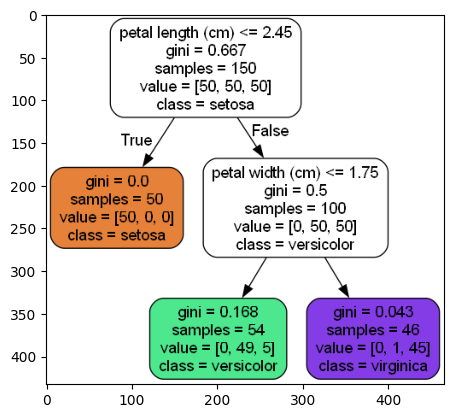

In [12]:
from matplotlib.image import  imread
iris_tree_png = imread('iris_tree.png')
plt.imshow(iris_tree_png)

In [13]:
# 概率预测
pred = tree_clf.predict_proba([[5,1.5]])
pred

array([[0.        , 0.90740741, 0.09259259]])

### 决策树中的正则化
`DecisionTreeClassifier` 类还有一些其他参数，可以限制决策树的形状：
防止过拟合（最坏情况枚举）
- `max_depth`（树最大的深度）
- `min_samples_split`（节点在分割之前必须具有的最小样本数）
- `min_samples_leaf`（叶子节点必须具有的最小样本数）
- `max_leaf_nodes`（叶子节点的最大数量）
- `max_features`（在每个节点处评估用于拆分的最大特征数）


In [14]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100,noise=0.25,random_state=42)
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf= 4 , random_state=42)
tree_clf1.fit(X,y)
tree_clf2.fit(X,y)

DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

### 回归任务

In [15]:
np.random.seed(42)
m = 200
X = np.random.rand(m,1)
y = 4*(X -0.5)**2 + np.random.randn(m,1)/10

In [16]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth =2 )
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [18]:
export_graphviz(
    tree_reg,
    out_file='reg_tree.dot',
    feature_names=['x1'],
    rounded=True,
    filled=True
)

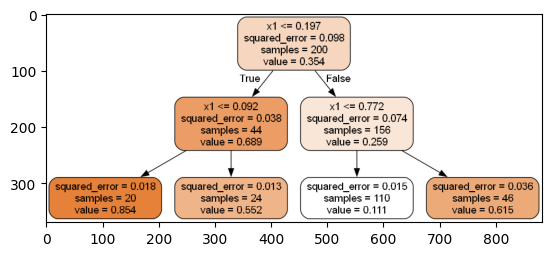

In [19]:
reg_tree = imread('tree_reg.png')
plt.imshow(reg_tree)